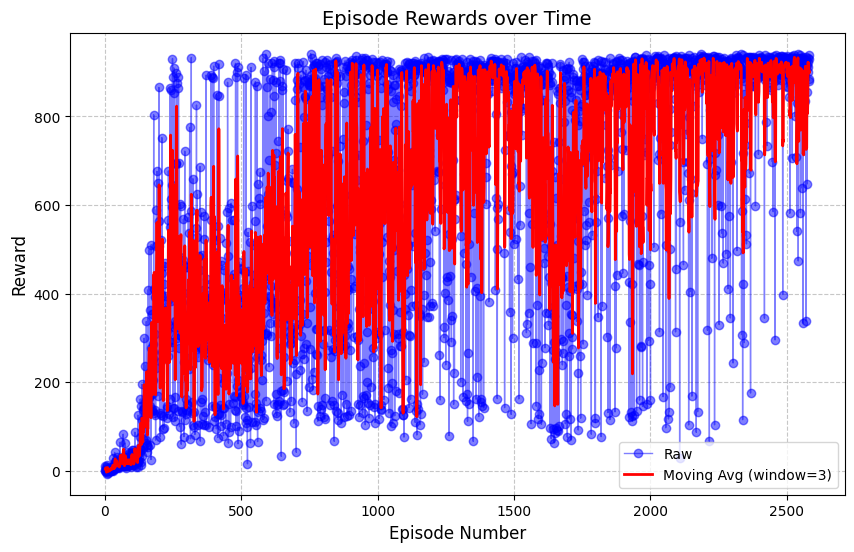

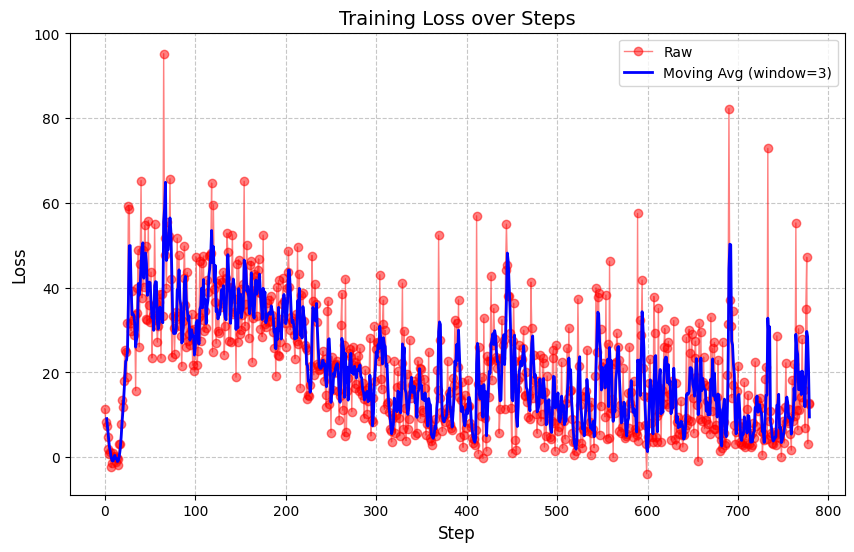

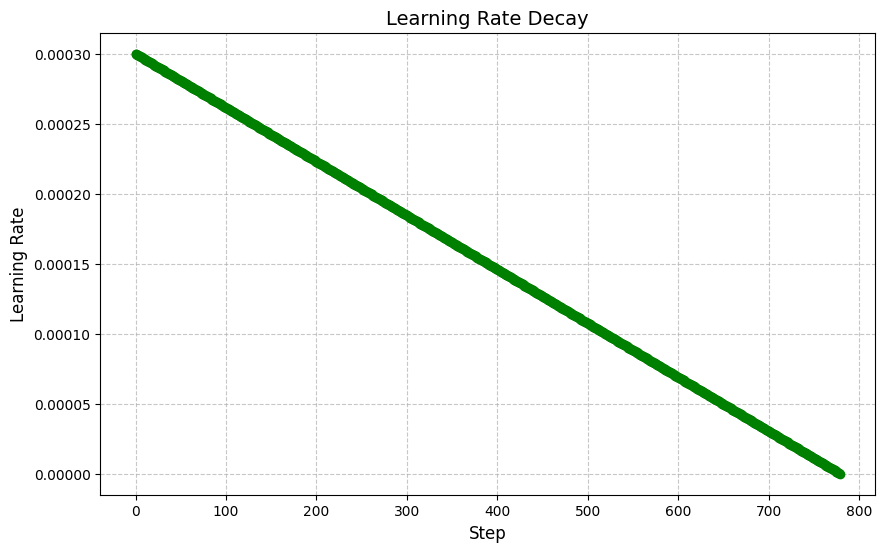

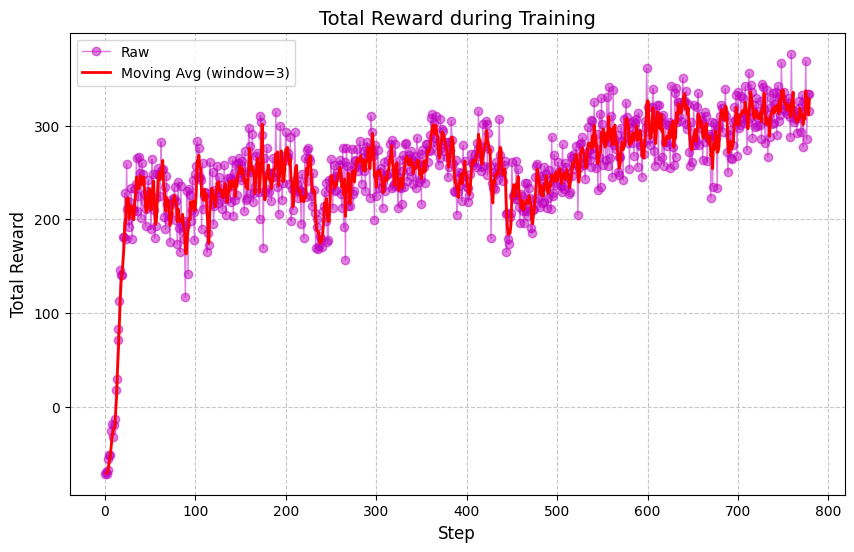

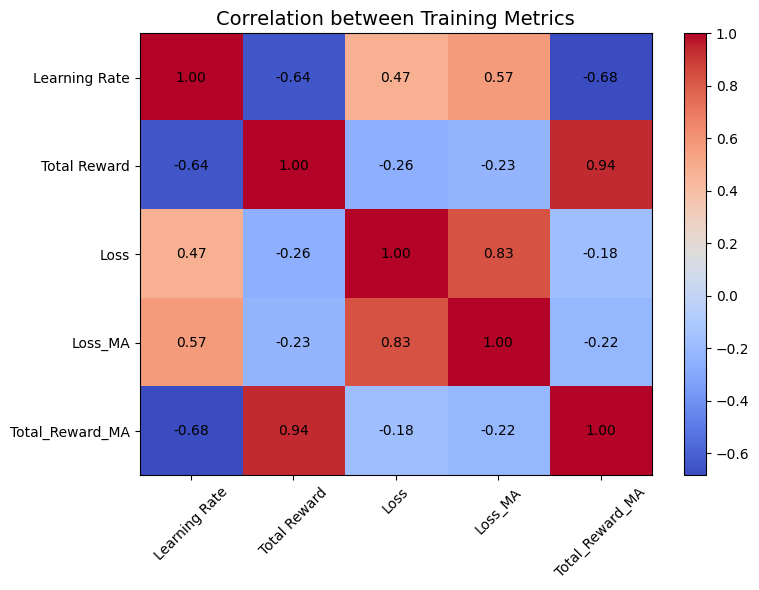

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
episode_rewards = pd.read_csv('episode_reward.csv')
training_metrics = pd.read_csv('training.csv')

# Calculate moving averages
window_size = 3
episode_rewards['Reward_MA'] = episode_rewards['Reward'].rolling(window=window_size).mean()
training_metrics['Loss_MA'] = training_metrics['Loss'].rolling(window=window_size).mean()
training_metrics['Total_Reward_MA'] = training_metrics['Total Reward'].rolling(window=window_size).mean()

# 1. Episode Rewards Plot
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards['Episode'], episode_rewards['Reward'], 'b-o', linewidth=1, alpha=0.5, label='Raw')
plt.plot(episode_rewards['Episode'], episode_rewards['Reward_MA'], 'r-', linewidth=2, label=f'Moving Avg (window={window_size})')
plt.title('Episode Rewards over Time', fontsize=14)
plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Reward', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 2. Training Loss Plot
plt.figure(figsize=(10, 6))
plt.plot(training_metrics['Loss'], 'r-o', linewidth=1, alpha=0.5, label='Raw')
plt.plot(training_metrics['Loss_MA'], 'b-', linewidth=2, label=f'Moving Avg (window={window_size})')
plt.title('Training Loss over Steps', fontsize=14)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 3. Learning Rate Plot
plt.figure(figsize=(10, 6))
plt.plot(training_metrics['Learning Rate'], 'g-o', linewidth=2)
plt.title('Learning Rate Decay', fontsize=14)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Learning Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 4. Total Reward Plot
plt.figure(figsize=(10, 6))
plt.plot(training_metrics['Total Reward'], 'm-o', linewidth=1, alpha=0.5, label='Raw')
plt.plot(training_metrics['Total_Reward_MA'], 'r-', linewidth=2, label=f'Moving Avg (window={window_size})')
plt.title('Total Reward during Training', fontsize=14)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Total Reward', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 5. Correlation Matrix
plt.figure(figsize=(8, 6))
correlation = training_metrics.corr()
plt.imshow(correlation, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation between Training Metrics', fontsize=14)

# Add correlation values as text
for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        plt.text(j, i, f'{correlation.iloc[i, j]:.2f}',
                ha='center', va='center')

plt.tight_layout()
plt.show()